# Jupyter GUI to interact with the simulation of Mobile Robot 

This is the further implementation on **Jupyter Notebook** of the [Software Architecture for Mobile Robot Control](https://github.com/ankurkohli007/Research_Track_I_Assignment_3.git). This implementation will demonstrates that robot's behavior such as switching to the different modalities such as **Autonomously reach a x,y coordinate inserted by the user**, **Letting the user drive the robot with the keyboard**, and **Letting the user drive the robot assisting them to avoid collisions** and managing the same modalities. Also, plotting the robot position, the laser scanner data and reached/not-reached targets.

In [9]:
#importing required libraries

# Here, The ipywidgets Python package provides Jupyter Widgets for the IPython kernel. 
from ipywidgets import Button, Layout, ButtonStyle, GridBox, VBox, HBox 
import ipywidgets as widgets
import rospy
import jupyros as jr
from std_msgs.msg import String
import ipywidgets as widgets
from IPython.display import display

# importing custom message from the final_assignment
from final_assignment.msg import Avoid
from geometry_msgs.msg import Twist

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7ff23e6cd700>>
Traceback (most recent call last):
  File "/home/ankurkohli007/.local/lib/python3.8/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/usr/lib/python3/dist-packages/matplotlib/backend_bases.py", line 1194, in _on_timer
    ret = func(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1447, in _step
    still_going = Animation._step(self, *args)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1173, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1192, in _draw_next_frame
    self._draw_frame(framedata)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)


In [10]:
# initializing the ROS node for Jupyter
rospy.init_node('jupyter_node')
# setting the parameters 
rospy.set_param('active', 0)

l = True # determines the appearance of a wall at the left side of robot
r = True # determines the appearance of a wall at the right side of robot
f = True # determines the appearance of a wall at the front side of robot

avoid = False

# Publishing value
pub = rospy.Publisher('cmd_vel', Twist, queue_size = 1)

# option-keys for robot's modalities

k1 = Button(description='Autonomously Reach',
            layout=Layout(width='auto', align="center", grid_area='k1'),
            style=ButtonStyle(button_color='lightblue'))

k2 = Button(description='Teleop Operation',
            llayout=Layout(width='auto', grid_area='k2'),
            style=ButtonStyle(button_color='moccasin'))

k3 = Button(description='Obstacle Avoidance',
            layout=Layout(width='auto', grid_area='k3'),
            style=ButtonStyle(button_color='pink'))

k4 = Button(description='Quit',
            layout=Layout(width='auto', grid_area='k4'),
            style=ButtonStyle(button_color='salmon'))

k5 = Button(description='Setting x,y coordinates',
            layout=Layout(width='auto', grid_area='k5'),
            style=ButtonStyle(button_color='lightgreen'))

# keys for teleop operation

k_front = Button(description='Move forward',
            layout=Layout(width='auto', grid_area='straight'),
            style=ButtonStyle(button_color='lightblue'))

k_right = Button(description='Turn right',
            layout=Layout(width='auto', grid_area='right'),
            style=ButtonStyle(button_color='lightblue'))
            
k_back = Button(description='Move backwards',
            layout=Layout(width='auto', grid_area='backward'),
            style=ButtonStyle(button_color='lightblue'))
            
k_left = Button(description='Turn left',
            layout=Layout(width='auto', grid_area='left'),
            style=ButtonStyle(button_color='lightblue'))
                      
k_stop = Button(description='Stop',
            layout=Layout(width='auto', grid_area='stop'),
            style=ButtonStyle(button_color='salmon'))
            
# dispaly output                
output = widgets.Output()

des_x = widgets.FloatText()
des_y = widgets.FloatText()

des_x_input = 0
des_y_input = 0


ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7ff23e6cd700>>
Traceback (most recent call last):
  File "/home/ankurkohli007/.local/lib/python3.8/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/usr/lib/python3/dist-packages/matplotlib/backend_bases.py", line 1194, in _on_timer
    ret = func(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1447, in _step
    still_going = Animation._step(self, *args)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1173, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1192, in _draw_next_frame
    self._draw_frame(framedata)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)


In [ ]:
# CallBack function is declared and it is used to check the presence of the wall which is close to the robot and what is the wall direction
def CallBack_avoidance(msg):

# gloabal keyword allows us to modify the variable outside of the current scope. It is used to create a global variable and make changes to the variable in a local context.

    global l
    global r
    global f
    global pub 
    
    twist = Twist()
    r = msg.right
    f = msg.front
    l = msg.left
    
    if f == 0:
        twist.linear.x = 0
        
    if l == 0:
        twist.angular.z = 0
        
    if r == 0:
        twist.angular.z = 0
        
    pub.publish(twist)  
    
# Function to define key for autonomous reach of the robot    
def key_option_autonomous_reach(k): 
    global avoid
    avoid = False
    
    print("Please enter the x,y coordinates for robot to reach autonomously and then press the selected key for okay ")
    
    display(des_x)
    display(des_y)
    
    display(k5,output)
    
# Function to define key to operate robot using teleop i.e. keyboard        
def key_option__teleop_operation(k):
    global avoid
    avoid = False
    
    print("Pressed key: " + str(k.description))
    rospy.set_param('active', 2)
    
    # display
    display(GridBox(children=[k_front, k_back, k_left, k_right, k_stop],
        layout=Layout(
       
            width='45%',
            grid_template_rows='auto',
            grid_template_columns='33% 33% 33%',
            grid_template_areas='''
            ". Front ."
            "Left Right"
            ". Back ."
            ".      ."
            ". Stop ."
            ''')  
       ))

# Function to define key to avoid obstacle while accomplishing the target
def key_option_obstacle_avoidance(k): 
    global avoid
    avoid = True
    
    print("Pressed key " + str(k.description))
    rospy.set_param('active', 3)
    
    display(GridBox(children=[k_front, k_back, k_left, k_right, k_stop],
        layout=Layout(
       
            width='45%',
            grid_template_rows='auto',
            grid_template_columns='33% 33% 33%',
            grid_template_areas='''
            ". Front ."
            "Left Right"
            ". Back ."
            ".      ."
            ". Stop ."
            ''')  
       ))

# Function to define Quit operations
def key_option_quit(k): 
    global avoid
    avoid = False
    
    print("Pressed key " + str(k.description))
    rospy.set_param('active', 0)

# Function to set target to drive robot in the defined position
def set_target(k):
    global des_x
    global des_y
    
    print("Pressed key & Target set")
    rospy.set_param('des_pos_x', des_x.value)
    rospy.set_param('des_pos_y', des_y.value)
    rospy.set_param('active', 1)

# function to drive robot in front direction    
def front_drive(k):
    global f
    global pub
    global avoid 
    
    twist = Twist()
    
    if avoid == 1:
        if ok_straight == 1:
            twist.linear.x = 1
            
        else:
            twist.linear.x = 0
    else:
        twist.linear.x = 1

    pub.publish(twist)

def left_drive(k):
    global l
    global pub
    global avoid 
    
    twist = Twist()
    
    if avoid == 1:
        if l == 1:
            twist.angular.z = 1

        else:
            twist.angular.z = 0
    else:
        twist.angular.z = 1
    
        
    pub.publish(twist)
    
def right_drive(k):
    global r
    global pub
    global avoid 
    
    twist = Twist()
    if avoid == 1:
        if r == 1:
            twist.angular.z = -1

        else:
            twist.angular.z = 0
    else:
        twist.angular.z = -1
        
    pub.publish(twist)
    
def back_drive(k):
    global pub
    
    twist = Twist()
    twist.linear.x = -1
        
    pub.publish(twist)

def stopped(k):
    global pub
    twist = Twist()
    # Publish stop message when thread exits.
    
    twist.linear.x = 0
    twist.linear.y = 0
    twist.linear.z = 0
    twist.angular.x = 0
    twist.angular.y = 0
    twist.angular.z = 0
    
    pub.publish(twist)

In [11]:
rospy.Subscriber("custom_controller", Avoid, CallBack_avoidance)   

k1.on_click(key_option_autonomous_reach)
k2.on_click(key_option__teleop_operation)
k3.on_click(key_option_obstacle_avoidance)
k4.on_click(key_option_obstacle_avoidance)

k5.on_click(set_target)

k_front.on_click(front_drive)
k_back.on_click(back_drive)
k_left.on_click(left_drive)
k_right.on_click(right_drive)

k_stop.on_click(stopped)

print("Plesase select the modoalities for robot's behaviour ")

GridBox(children=[k1, k2, k3, k4],
        layout=Layout(
       
            width='40%',
            grid_template_rows='auto auto',
            grid_template_columns='50% 50%',
            grid_template_areas='''
            "k1 k2 "
            "k3 k4 "
            ''')  
       )

Plesase select the modoalities for robot's behaviour 


ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7ff23e6cd700>>
Traceback (most recent call last):
  File "/home/ankurkohli007/.local/lib/python3.8/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/usr/lib/python3/dist-packages/matplotlib/backend_bases.py", line 1194, in _on_timer
    ret = func(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1447, in _step
    still_going = Animation._step(self, *args)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1173, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1192, in _draw_next_frame
    self._draw_frame(framedata)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)


GridBox(children=(Button(description='Autonomously Reach', layout=Layout(grid_area='k1', width='auto'), style=…

# Graphical Representation of the Robot's Odometry & Laser Scanner 

This part will demonstrates the graphical representation of the robot's behavior during the Simulation.

* The first graph will represents the position described by the odometry topic of the robot. The graph will show the position of the robot in space with red dots.
* The second graph will represents the values retrieved by the laser scan arrays the robot is equipped with.
* The third graph will represents the same thing as the previous one but on a polar graph representation.

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7ff23e6cd700>>
Traceback (most recent call last):
  File "/home/ankurkohli007/.local/lib/python3.8/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/usr/lib/python3/dist-packages/matplotlib/backend_bases.py", line 1194, in _on_timer
    ret = func(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1447, in _step
    still_going = Animation._step(self, *args)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1173, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1192, in _draw_next_frame
    self._draw_frame(framedata)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)


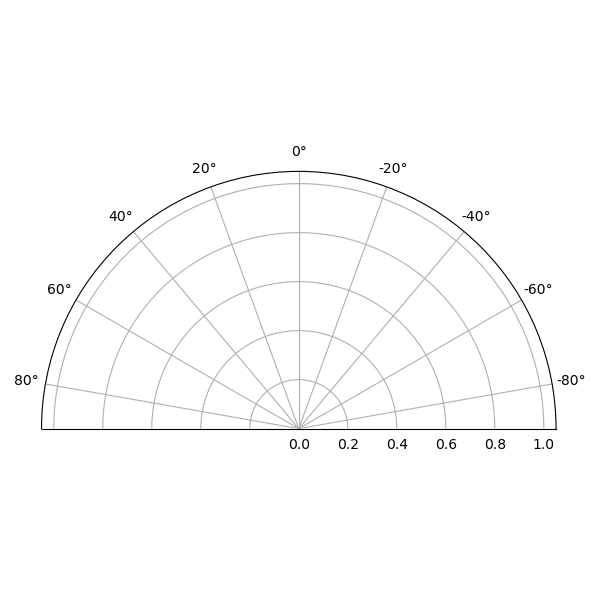

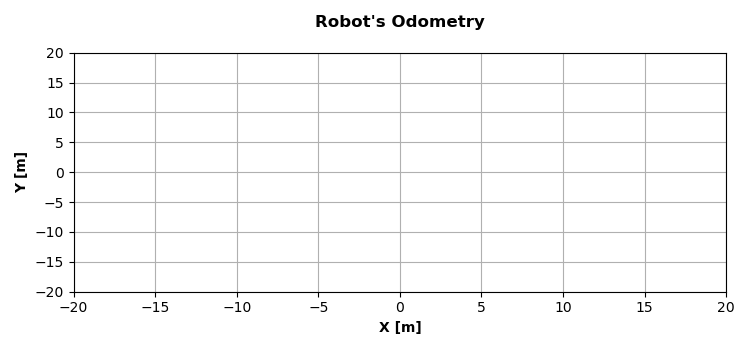

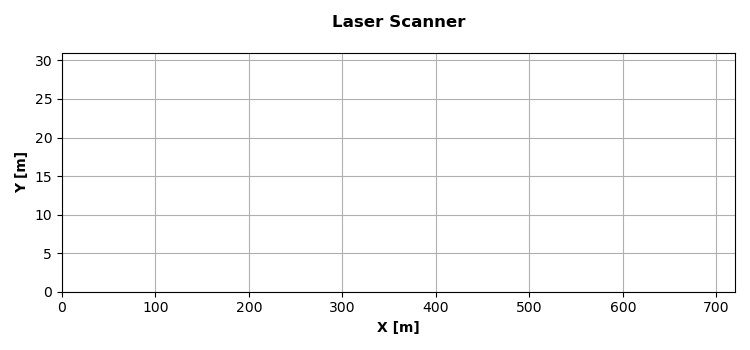

In [12]:
# including matplotlib library
%matplotlib widget

# importing required libraries

import matplotlib.pyplot as plt
import rospy
import tf
from tf.transformations import quaternion_matrix 
import numpy as np
from matplotlib.animation import FuncAnimation
from sensor_msgs.msg import LaserScan
from move_base_msgs.msg import MoveBaseActionGoal 
from nav_msgs.msg import Odometry
from actionlib_msgs.msg import GoalStatusArray
import time

# for angles 
angles = []

# class declared
class DataVisualization:
    
    # initialization
    def __init__(self):
        self.fig, self.ax = plt.subplots() 
        self.ln, = plt.plot([], [], 'ro')
        plt.grid(True)
        
        self.fig2,self.ax2 = plt.subplots()
        self.ln2,= plt.plot([], [], 'b-')
        plt.grid(True)
        
        self.figp = plt.figure(figsize=(6,6))
        self.ax_p = plt.subplot(111, polar=True)
        self.ax_p.set_thetalim(-np.pi/2,np.pi/2)
        
        self.ax_p.set_theta_zero_location("N")
        self.lnp, = self.ax_p.plot([],[],'bo')
        plt.grid(True)
        
        self.x_data, self.y_data = [] , []
        self.scanner = []
        
        
    def plot_init(self): 
        
        self.ax.set_title("Robot's Odometry\n",fontweight="bold")
        self.ax.set_xlim(-20, 20) 
        self.ax.set_ylim(-20, 20) 
        self.ax.set_xlabel("X [m]",fontweight="bold")
        self.ax.set_ylabel("Y [m]",fontweight="bold")
        
        self.ax2.set_title("Laser Scanner\n",fontweight="bold")
        self.ax2.set_xlim(0, 720)
        self.ax2.set_ylim(0,31)
        self.ax2.set_xlabel("X [m]",fontweight="bold")
        self.ax2.set_ylabel("Y [m]",fontweight="bold")
        
        self.ax_p.set_title("Laser scanner (polar)\n",fontweight="bold")
        self.ax_p.set_ylabel("Distance [m]",fontweight="bold")
        self.ax_p.set_rmax(20)
        
        return self.ln, self.ln2, self.lnp
        
    # CallBack_odometry function callback's to the topic odom (odometry) which is required to recover the present of the robot in the environment in terms of x and y. Also, the information about the odom of the robot is allocated to gloabl position_ variable.
    def CallBack_odometry(self, msg): 
        
        self.y_data.append(msg.pose.pose.position.y) 
        self.x_data.append(msg.pose.pose.position.x)
    
    # function to define CallBack function for laser scanner 
    def laser_CallBack(self, msg): 
        
        global angles 
        
        self.scanner = list(msg.ranges)
        angles = list(np.arange(msg.angle_min, msg.angle_max + msg.angle_increment, msg.angle_increment))
        
        return self.scanner
        
    # function to define first graphical updates    
    def graph1_updates(self, frame): 
        
        self.ln.set_data(self.x_data, self.y_data) 
        
        return self.ln
    
    # function to define second graphical updates 
    def graph2_updates(self, frame):
        
        self.ln2.set_data(list(np.linspace(0,720,720)),self.scanner)
        
        return self.ln2
    
    # function to define polar graphical updates 
    def polar_updates(self, frame):
        
        global angles 
        
        self.lnp.set_data(angles,self.scanner)
        return self.lnp


#rospy.init_node('data_visualization')

datavis = DataVisualization()

sub3 = rospy.Subscriber('/odom', Odometry, datavis.CallBack_odometry)

sub2 = rospy.Subscriber('/scan', LaserScan, datavis.laser_CallBack)

ani3 = FuncAnimation(datavis.fig, datavis.graph1_updates, init_func = datavis.plot_init) 
ani2= FuncAnimation(datavis.fig2, datavis.graph1_updates, init_func = datavis.plot_init)
anip= FuncAnimation(datavis.figp, datavis.polar_updates,init_func = datavis.plot_init)

plt.show(block=True)

# Plotting of the robot's position, the laser scanner data 

This section will highlights the plotting of the robot's position, laser scanner data and reached.not-reached targets

In [ ]:
# including matplotlib library
%matplotlib widget


# importing required libraries
import matplotlib.pyplot as plt
import rospy
import tf
from tf.transformations import quaternion_matrix 
import numpy as np
from matplotlib.animation import FuncAnimation
from actionlib_msgs.msg import GoalStatusArray

# status updates
status = [0,0]

# initialising robot's position i.e. x & y coordinates
position_x = 0
position_y = 0

# class declaredGoal
class DataVisualization:
    
    # initialization
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        # ploting graph for robot's status
        self.ln_g, = plt.plot([], [], 'go',label='Target Achived')
        self.ln_r, = plt.plot([], [], 'ro',label='Target Aborted')
        self.ln_x, = plt.plot([], [], 'yo',label='Reaching Target')
        
        plt.grid()
        plt.xlabel("x[m]")
        plt.ylabel("y[m]")
        plt.legend(handles=[self.ln_g, self.ln_r,self.ln_x], loc='lower right')
        
        self.x_data_g, self.y_data_g = [] , []
        self.x_data_r, self.y_data_r = [] , []
        self.x_data_x, self.y_data_x = [] , []
    
    def plot_init(self): 
        self.ax.set_xlim(-20, 20) 
        self.ax.set_ylim(-20, 20) 
        
        return self.ln_g, self.ln_r, self.ln_x
    
    # CallBack function defined to check the robot's status
    def CallBack_status(self, msg): 
        
        global status 
        global position_x
        global position_y
        
        try:
            status.append(msg.status_list[0].status)

            position_x = rospy.get_param("des_pos_x")
            position_y = rospy.get_param("des_pos_y")

            # checking the status conditions
            
            if status[-1] == 1 and status[-2] != 1:

                self.y_data_x.append(position_y) 
                self.x_data_x.append(position_x)

            elif (status[-1] == 2 and status[-2] != 2) or (status[-1] == 4 and status[-2] != 4):

                self.y_data_x.clear()
                self.x_data_x.clear()
                self.y_data_r.append(position_y) 
                self.x_data_r.append(position_x)

            elif status[-1] == 3 and status[-2] != 3:

                self.y_data_x.clear()
                self.x_data_x.clear()
                self.y_data_g.append(position_y) 
                self.x_data_g.append(position_x)
                
        except IndexError:
            pass
        
    
    def update(self, frame):
        
        self.ln_g.set_data(self.x_data_g, self.y_data_g)
        self.ln_r.set_data(self.x_data_r, self.y_data_r)
        self.ln_x.set_data(self.x_data_x, self.y_data_x)

        return self.ln_g,self.ln_r,self.ln_xe
            
       
        

datavis2 = DataVisualization()

sub = rospy.Subscriber('/move_base/status', GoalStatusArray, datavis2.CallBack_status)

ani = FuncAnimation(datavis2.fig, datavis2.update, init_func = datavis2.plot_init)


plt.show(block=True)

# Plotting of the reaching/not reaching the target

This part will describes the plotting of the robot's status about reaching and not target.

In [ ]:
# including matplotlib library
%matplotlib widget


# importing required libraries
import numpy as np
from matplotlib import animation as animation, pyplot as plt, cm
from actionlib_msgs.msg import GoalStatusArray
import rospy

# ploting parameters
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# figure plotted
fig = plt.figure()


data = [0 , 0]

g = 0
r = 0

status = [0 , 0]

# bar graph for the Traget achieved or not
bars = plt.bar(["Not-reached","Reached"], data, color = ['red', 'green'])


# CallBack function defined to check the robot's status
def CallBack_status(msg): 

    global status 
    global g
    global r
    
    try: 
        
        status.append(msg.status_list[0].status)

        if status[-1] == 3 and status[-2] != 3:
            g = g + 1

        elif status[-1] == 2 and status[-2] != 2:
            r = r + 1

        elif status[-1] == 4 and status[-2] != 2:
            r = r + 1
            
            
    except IndexError:
        pass

# function to define ploting of the graph    
def update_graph(frame):
    
    global bars
    global g
    global r
    
    g_ = g
    r_ = r
    data_ = [g_, r_]
    
    bars = plt.bar(["Not-reached","Reached"], data_, color = ['red', 'green'])

    
sub4 = rospy.Subscriber('/move_base/status', GoalStatusArray, CallBack_status)

ani5 = animation.FuncAnimation(fig, update_graph, interval = 100)

plt.show()

# Target Node to check the robot's state

This will depicts that whether the robot reached at the target or not. This will define by the graphical representation.

In [ ]:
# including matplotlib library
%matplotlib widget


# importing required libraries
import matplotlib.pyplot as plt
import rospy
import tf
from tf.transformations import quaternion_matrix 
import numpy as np
from matplotlib.animation import FuncAnimation
from actionlib_msgs.msg import GoalStatusArray

# rospy.init_node('target_node')

status = [0,0]

position_x = 0
position_y = 0

# class declared 
class DataVisualization:
    
    # initialization
    def __init__(self):
        self.fig, self.ax = plt.subplots() 
        self.ln_g, = plt.plot([], [], 'go',label='Reached')
        self.ln_r, = plt.plot([], [], 'ro',label='Aborted')
        self.ln_x, = plt.plot([], [], 'yo',label='Not-reached')
        
        plt.grid()
        plt.xlabel("x[m]")
        plt.ylabel("y[m]")
        plt.legend(handles=[self.ln_g, self.ln_r,self.ln_x], loc='lower right')
        
        self.x_data_g, self.y_data_g = [] , []
        self.x_data_r, self.y_data_r = [] , []
        self.x_data_x, self.y_data_x = [] , []
        
    def plot_init(self): 
        self.ax.set_xlim(-20, 20) 
        self.ax.set_ylim(-20, 20) 
        
        return self.ln_g, self.ln_r, self.ln_x
    
    def CallBack_status(self, msg): 
        
        global status 
        global position_x
        global position_y
        
        try:
            status.append(msg.status_list[0].status)

            position_x = rospy.get_param("des_pos_x")
            position_y = rospy.get_param("des_pos_y")


            if status[-1] == 1 and status[-2] != 1:

                self.y_data_x.append(pos_y) 
                self.x_data_x.append(pos_x)

            elif (status[-1] == 2 and status[-2] != 2) or (status[-1] == 4 and status[-2] != 4):

                self.y_data_x.clear()
                self.x_data_x.clear()
                self.y_data_r.append(position_y) 
                self.x_data_r.append(position_x)

            elif status[-1] == 3 and status[-2] != 3:

                self.y_data_x.clear()
                self.x_data_x.clear()
                self.y_data_g.append(position_y) 
                self.x_data_g.append(position_x)
                
        except IndexError:
            pass
        
    
    def update_plot(self, frame):
        
        self.ln_g.set_data(self.x_data_g, self.y_data_g)
        self.ln_r.set_data(self.x_data_r, self.y_data_r)
        self.ln_x.set_data(self.x_data_x, self.y_data_x)

        return self.ln_g,self.ln_r,self.ln_xe
            
       
        

datavis3 = DataVisualization()
sub = rospy.Subscriber('/move_base/status', GoalStatusArray, datavis3.CallBack_status)

ani = FuncAnimation(datavis3.fig, datavis3.update_plot, init_func = datavis3.plot_init)


        
plt.show(block=True)